![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights
## Vương Tuấn Khanh
## Đặng Văn An

**Link to Google Data Studio report:** [Here](https://datastudio.google.com/reporting/9429342c-ff26-4b7f-8b19-e892776b86d7)

## Dataset - Online Retailes Purchase


### Step 1 - Checking the data

**Import tools set**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

**Check Uploaded Dataset**

In [0]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/drive/My Drive/ColabFile/terrorism.csv', encoding = 'ISO-8859-1')

In [0]:
# Check the first 5 rows
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [0]:
# Check the last 5 rows
df.tail(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,...,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

**Get more information from the Dataset**

In [0]:
# Check the dataframe informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [0]:
for col in df.columns: 
    print(col) 

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

### Step 2 - Cleaning the data

**Check for NaN values**

In [0]:
# List all the NaN values
# First, we create a Dataframe that hold the number of Nan values
NaN_list = pd.isna(df).sum()
# Then we list all the columns that have at least 1 NaN value
NaN_List = NaN_list[NaN_list.values > 0]
NaN_List

approxdate    172452
resolution    179471
provstate        421
city             434
latitude        4556
               ...  
addnotes      153402
scite1         66191
scite2        104758
scite3        138175
related       156653
Length: 106, dtype: int64

**Examine few examples of NaN values**

In [0]:
# Let take 5 example of 'propextent' columns with NaN value
df[df['propextent'].isna()].sample(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
107961,201205180025,2012,5,18,NaN,0,NaN,6,Algeria,10,Middle East & North Africa,Tizi Ouzou,Azzefoun,36.894451,4.419943,1.0,0,NaN,05/18/2012: An explosive device detonated near...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Algerian National Navy,Coast Guard Barracks,...,NaN,NaN,A homemade bomb was used in the attack.,2.0,0.0,0.0,2.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Algerian soldier said killed in home-made bom...","""2 Algerian coastguards killed in bomb attac...","""Two Algerian soldiers said killed in Berber a...",START Primary Collection,-9,-9,0,-9,NaN
115817,201304070042,2013,4,7,NaN,0,NaN,147,Nigeria,11,Sub-Saharan Africa,Yobe,Geidam,12.885850,11.930080,1.0,0,NaN,04/07/2013: Assailants attempted to attack mil...,1,1,1,0.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Nigeria Police Force (NPF),Divisional Police Station,...,NaN,NaN,NaN,NaN,0.0,13.0,NaN,0.0,NaN,-9,NaN,NaN,NaN,It is unknown if the military posts and Divisi...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Policeman killed in Borno Boko Haram attack,""...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
1029,197109240004,1971,9,24,NaN,0,NaN,217,United States,1,North America,Michigan,Detroit,42.331685,-83.047924,1.0,0,NaN,"9/24/1971: Barbara Pliskow, a member of the Wh...",1,1,1,0.0,NaN,NaN,0.0,0,0,4,Hijacking,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),American Airlines,American Airlines Flight 124,...,NaN,NaN,Two sticks of dynamite and .25 caliber pistol,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,After receiving a tip of the planned hijacking...,"""Armed Woman Held on Hijacking Tip,"" New York ...","""Police In Detroit Foil Hijack Try,"" Baltimore...","""Woman Seized In Hijack Attempt South To Free ...",Hewitt Project,0,0,0,0,NaN
130114,201404100058,2014,4,10,NaN,0,NaN,92,India,6,South Asia,Chhattisgarh,Gadiras,18.505819,81.554154,1.0,1,NaN,04/10/2014: Assailants opened fire on a pollin...,1,1,1,0.0,NaN,NaN,1.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,2,Government (General),19.0,Election-related,Election Commission of India,Polling Station,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,It is unknown if the polling station was damag...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Lok Sabha polls 2014: 52% voting in Bastar, p...","""People brave Maoist threat to vote across sta...",NaN,START Primary Collection,-9,-9,0,-9,"201404100054, 201404100058, 201404100059, 2014..."
3550,197601290002,1976,1,29,NaN,0,NaN,603,United Kingdom,8,Western Europe,Northern Ireland,Belfast,54.607712,-5.956210,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,69.0,Religion Identified,NaN,"Joseph McAlinden, 44, Catholic",...,NaN,NaN,Firearm,1.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [0]:
# The length of our Dataframe is
length = len(df.index)
length
# We can use the .shape property or just len(DataFrame.index). However, there are notable performance differences ( len(DataFrame.index) is the fastest)

181691

- Ok, We have seen that there are many columns containing NaN values

- Since our data volume is quite large (181691 rows ), having columns with such a small amount of data will not be practical and useless because they do not reflect the trend of our DataFrame.

- So we will now drop all the columns that have NaN values that accounts for more than 60% of the total

In [0]:
# First, calculate the 60% value of length
Percentage = round(length*60/100)
Percentage

109015

In [0]:
# Second, we need to create a list of columns with NaN values greater or equal than 60% of the total.
NaN_Columns = NaN_List[NaN_List.values >= Percentage]
NaN_Columns = NaN_Columns.index
NaN_Columns 

Index(['approxdate', 'resolution', 'location', 'alternative',
       'alternative_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3',
       'attacktype3_txt', 'targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
       'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname', 'gname2',
       'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain2',
       'guncertain3', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2',
       'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim',
       'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
       'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt',
       'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt',
       'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'nhostkid',
       'nhostkidus', 'nhours', 'ndays', 'divert'

- **We need to pay close attention to the listed values carefully as some fields may be important and affect the trend of the data.**
- **In this case, the columns in this list have unnecessary values for the study so we can ignore**

In [0]:
# Finally, we drop all the columns in the NaN_Column list
df = df.drop(columns = NaN_Columns)

In [0]:
# Take 5 example
df.sample(5)
# As we can see, columns with many NaN values have been deleted

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
135622,201407260064,2014,7,26,0,214,Ukraine,9,Eastern Europe,Luhansk,Luhansk,48.581535,39.355545,1.0,0,07/26/2014: Assailants launched rockets at Luh...,1,1,0,1.0,0.0,1,0,3,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Armed Forces of Ukraine,Luhansk International Airport,214.0,Ukraine,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",A rocket was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,0.0,NaN,"""Nine civilians said killed in Ukraine's Luhan...",NaN,START Primary Collection,-9,-9,0,-9
86689,200805030004,2008,5,3,0,95,Iraq,10,Middle East & North Africa,Diyala,Khanaqin,34.347343,45.383274,1.0,0,"05/03/2008: On Saturday, a seven year old boy,...",1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,14,Private Citizens & Property,68.0,Named Civilian,NaN,"A seven year old boy, Mohammed Omran,",95.0,Iraq,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,17.0,Other Explosive Type,An IED comprised of a flashlight rigged with e...,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,"Voice of Iraq, ""Communist Party Official Assas...","Hussein Kadhim, ""Round-up of Daily Violence - ...",ISVG,-9,-9,0,-9
129241,201403240018,2014,3,24,1,113,Libya,10,Middle East & North Africa,Tripoli,Tripoli,32.831356,13.211191,1.0,0,03/24/2014: Assailants abducted and assaulted ...,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),2,Government (General),18.0,"Government Personnel (excluding police, military)",Central Bank of Libya (CBL),Media Office Head: Isam al-Oul,113.0,Libya,Unknown,0.0,0,-99.0,0.0,0.0,5,Firearms,5.0,Unknown Gun Type,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0,1.0,0.0,"""Head of Central Bank of Libya's media office ...","""SOCAFRICA: Libya Incident Tracker, 23-29 Mar ...",START Primary Collection,-9,-9,0,-9
47820,199108210009,1991,8,21,0,160,Philippines,5,Southeast Asia,Aguasan Del Sur,Unknown,8.421877,125.839596,4.0,1,NaN,1,1,0,1.0,0.0,1,0,2,Armed Assault,4,Military,29.0,Military Unit/Patrol/Convoy,Military,Unit,160.0,Philippines,New People's Army (NPA),0.0,0,NaN,NaN,NaN,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,Automatic firearm,6.0,NaN,NaN,0.0,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,0,0,0,0
155237,201511090024,2015,11,9,0,96,Ireland,8,Western Europe,Dublin,Rathfarnham,53.361675,-6.245485,1.0,0,11/09/2015: An explosive device was discovered...,1,1,1,0.0,0.0,0,0,3,Bombing/Explosion,20,Unknown,NaN,NaN,Unknown,Unknown,96.0,Ireland,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,"""Bomb disposal unit make safe explosive device...","""Viable bomb uncovered by workmen in south Dub...",START Primary Collection,-9,-9,0,-9


**Dataframe titles**

- So now we will proceed to clean up more Dataframe
- We want the output to be visual, so I'll now delete the columns with the title equivalent of the title of another column + '_ txt'
- For example, 'country' will give the code, while 'country_txt' will give the Country's name, we'll just take the name

In [0]:
# List all the duplicated columns
Duplicated_Columns = df.columns
Duplicated_Columns = Duplicated_Columns[Duplicated_Columns.str.contains('_txt')]
Duplicated_Columns

Index(['country_txt', 'region_txt', 'attacktype1_txt', 'targtype1_txt',
       'targsubtype1_txt', 'natlty1_txt', 'weaptype1_txt', 'weapsubtype1_txt'],
      dtype='object')

In [0]:
# Delete the '_txt' part
temp = []
for i in Duplicated_Columns:
  temp.insert(len(temp),i[:-4])
Duplicated_Columns = temp
Duplicated_Columns

['country',
 'region',
 'attacktype1',
 'targtype1',
 'targsubtype1',
 'natlty1',
 'weaptype1',
 'weapsubtype1']

In [0]:
# Finally, we drop all the columns in the Duplicated_Columns list
df = df.drop(columns = Duplicated_Columns)

In [0]:
# Take 5 example
df.sample(5)

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,corp1,target1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1_txt,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
153512,201509260010,2015,9,26,0,Turkey,Middle East & North Africa,Sirnak,Beytussebap district,37.654147,43.138712,3.0,0,09/26/2015: Assailants opened fire on a Turkis...,1,1,1,0.0,1.0,1,0,Armed Assault,Military,Military Barracks/Base/Headquarters/Checkpost,Turkish Gendarmerie,Building,Turkey,Kurdistan Workers' Party (PKK),0.0,0,-99.0,0.0,0.0,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",Mortars and firearms were used in the attack.,3.0,0.0,0.0,10.0,0.0,0.0,0,0.0,NaN,"""Major killed in PKK attack laid to rest in An...","""Four civilians killed amid clashes in southea...",START Primary Collection,0,0,0,0
122903,201310310044,2013,10,31,0,Iraq,Middle East & North Africa,Diyala,Baqubah,33.743240,44.623825,1.0,1,10/31/2013: An explosive device detonated in a...,1,1,1,0.0,0.0,1,0,Bombing/Explosion,Private Citizens & Property,"Public Area (garden, parking lot, garage, beac...",Not Applicable,Park,Iraq,Unknown,0.0,0,-99.0,0.0,0.0,Explosives,Unknown Explosive Type,NaN,6.0,0.0,0.0,1.0,0.0,0.0,-9,0.0,NaN,"""Iraq: Roundup of Security Incidents 28 Octobe...",NaN,START Primary Collection,-9,-9,0,-9
138251,201409240064,2014,9,24,0,Libya,Middle East & North Africa,Wadi Al Hayaa,Ubari,26.561832,12.880869,1.0,0,09/24/2014: Assailants opened fire on a police...,1,1,1,0.0,0.0,1,0,Armed Assault,Police,"Police Building (headquarters, station, school)",Libyan National Police (LNP),Police Station,Libya,Unknown,0.0,0,-99.0,0.0,0.0,Firearms,Unknown Gun Type,NaN,0.0,0.0,0.0,27.0,0.0,0.0,1,0.0,NaN,"""Libya: Libya Security Forces, Tribesmen Battl...",NaN,START Primary Collection,-9,-9,0,-9
41127,199001070003,1990,1,7,0,Japan,East Asia,Nara,nara,34.685087,135.805000,1.0,0,NaN,1,1,1,0.0,0.0,1,0,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,govt,"office bldg, tomb of emperor kaika",Japan,Nara Red Army,0.0,0,NaN,NaN,NaN,Incendiary,NaN,Incendiary,0.0,NaN,NaN,0.0,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS,0,0,0,0
128985,201403180078,2014,3,18,1,Sudan,Sub-Saharan Africa,North Darfur,Jak,13.026268,24.840312,2.0,0,03/18/2014: Assailants attacked residents in J...,1,1,1,0.0,1.0,1,0,Facility/Infrastructure Attack,Private Citizens & Property,Village/City/Town/Suburb,Jak Village,Village,Sudan,Janjaweed,0.0,0,-99.0,0.0,0.0,Incendiary,Arson/Fire,NaN,NaN,0.0,0.0,NaN,0.0,0.0,1,0.0,NaN,"""Dead, Injured As More Than 16 Villages Attack...",NaN,START Primary Collection,0,0,0,0


In [0]:
# Delete some unnecessary columns left
df = df.drop(['INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'], axis = 1)
df.head(5)

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,corp1,target1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1_txt,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,ransom,scite1,scite2,dbsource
0,197000000001,1970,7,2,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0.0,0.0,1,0,Assassination,Private Citizens & Property,Named Civilian,NaN,Julio Guzman,Dominican Republic,MANO-D,0.0,0,NaN,NaN,NaN,Unknown,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,0.0,NaN,NaN,PGIS
1,197000000002,1970,0,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,23rd of September Communist League,0.0,0,7.0,NaN,NaN,Unknown,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,1.0,NaN,NaN,PGIS
2,197001000001,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1,1,1,0.0,0.0,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Voice of America,Employee,United States,Unknown,0.0,0,NaN,NaN,NaN,Unknown,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,0.0,NaN,NaN,PGIS
3,197001000002,1970,1,0,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1,1,1,0.0,0.0,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,NaN,U.S. Embassy,United States,Unknown,0.0,0,NaN,NaN,NaN,Explosives,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS
4,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,NaN,U.S. Consulate,United States,Unknown,0.0,0,NaN,NaN,NaN,Incendiary,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS


**Recheck our Data**

In [0]:
# List all the NaN values
# A Dataframe that hold the number of Nan values
NaN_list = pd.isna(df).sum()
# Then we list all the columns that have at least 1 NaN value
NaN_List = NaN_list[NaN_list.values > 0]
NaN_List

provstate              421
city                   434
latitude              4556
longitude             4557
specificity              6
summary              66129
doubtterr                1
multiple                 1
targsubtype1_txt     10373
corp1                42550
target1                636
natlty1_txt           1559
guncertain1            380
nperps               71115
nperpcap             69489
claimed              66120
weapsubtype1_txt     20768
weapdetail           67670
nkill                10313
nkillus              64446
nkillter             66958
nwound               16311
nwoundus             64702
nwoundte             69143
ishostkid              178
ransom              104310
scite1               66191
scite2              104758
dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 48 columns):
eventid             181691 non-null int64
iyear               181691 non-null int64
imonth              181691 non-null int64
iday                181691 non-null int64
extended            181691 non-null int64
country_txt         181691 non-null object
region_txt          181691 non-null object
provstate           181270 non-null object
city                181257 non-null object
latitude            177135 non-null float64
longitude           177134 non-null float64
specificity         181685 non-null float64
vicinity            181691 non-null int64
summary             115562 non-null object
crit1               181691 non-null int64
crit2               181691 non-null int64
crit3               181691 non-null int64
doubtterr           181690 non-null float64
multiple            181690 non-null float64
success             181691 non-null int64
suicide             181691 non-nul

In [0]:
df.sample(3)

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1_txt,targtype1_txt,targsubtype1_txt,corp1,target1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1_txt,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,ransom,scite1,scite2,dbsource
48211,199109230010,1991,9,23,0,Myanmar,Southeast Asia,Yangon,Yangon,16.887781,96.149559,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,Bombing/Explosion,Business,Entertainment/Cultural/Stadium/Casino,NaN,Theater,Myanmar,Unknown,0.0,0,NaN,NaN,NaN,Explosives,Grenade,Grenade,0.0,NaN,NaN,7.0,NaN,NaN,1,0.0,0.0,NaN,NaN,PGIS
47391,199107240011,1991,7,24,0,India,South Asia,Andhra Pradesh,Medak District,18.046000,78.263000,3.0,0,NaN,1,1,1,0.0,0.0,1,0,Hostage Taking (Kidnapping),Government (General),Politician or Political Party Movement/Meeting...,Youth Congress-I Party,General Secretary Farooq Hussain,India,Naxalites,0.0,0,NaN,NaN,NaN,Firearms,Handgun,Pistol,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,0.0,NaN,NaN,PGIS
32533,198710290012,1987,10,29,0,Lebanon,Middle East & North Africa,Beirut,Beirut,33.888523,35.503513,1.0,0,NaN,1,1,0,1.0,0.0,1,0,Assassination,Military,"Military Personnel (soldiers, troops, officers...",French Army,3 French Military Personel,France,Unknown,0.0,0,2.0,NaN,NaN,Firearms,Automatic or Semi-Automatic Rifle,Automatic firearm,3.0,NaN,NaN,0.0,NaN,NaN,0,0.0,0.0,NaN,NaN,PGIS


### Step 3 - EDA

**First, let see the top 5 dangerous country which have the most Terrorism of all kinds**

In [0]:
# Count the number of events in each country
temp = df.groupby(['country_txt']).count()
# Sort them
temp = temp.sort_values(by=['eventid'],ascending = False)
# Take the top 5
Top_5 = temp['eventid'].head(5)
Top_5

country_txt
Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: eventid, dtype: int64

**Next, we will probably want to know what kind of terrorism is the most popular**

In [0]:
temp = df.groupby(['attacktype1_txt']).count()
# Sort them
temp = temp.sort_values(by=['eventid'],ascending = False)
# Take the top 5
Top_5 = temp['eventid'].head(5)
Top_5

attacktype1_txt
Bombing/Explosion                 88255
Armed Assault                     42669
Assassination                     19312
Hostage Taking (Kidnapping)       11158
Facility/Infrastructure Attack    10356
Name: eventid, dtype: int64

**And which city is most persecuted?**

In [0]:
temp = df.groupby(['city']).count()
# Sort them
temp = temp.sort_values(by=['eventid'],ascending = False)
# Take the top 5
Top_5 = temp['eventid'].head(5)
Top_5

city
Unknown    9775
Baghdad    7589
Karachi    2652
Lima       2359
Mosul      2265
Name: eventid, dtype: int64

**Which region is most persecuted?**

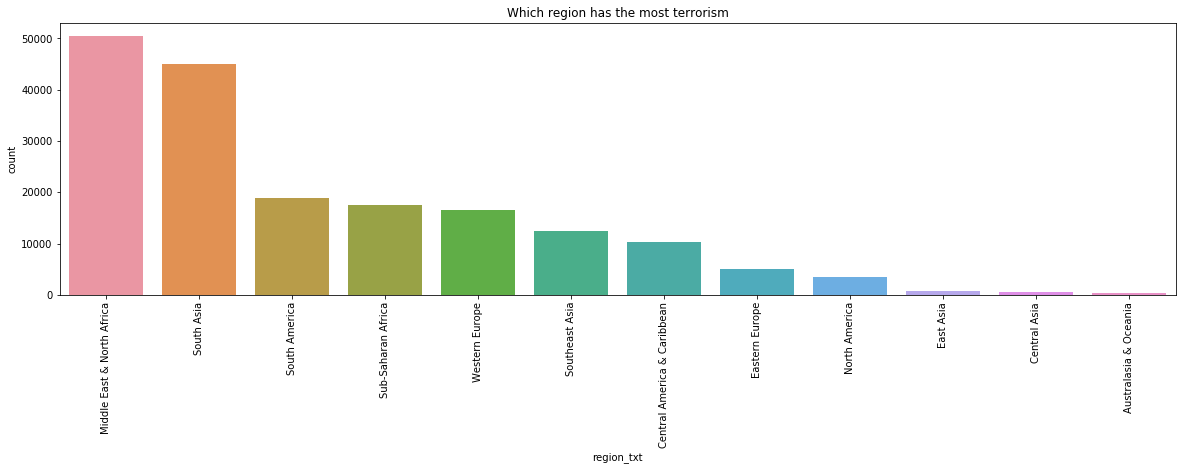

In [0]:
plt.subplots(figsize=(20,5))
sns.countplot('region_txt',data=df, order=df['region_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Which region has the most terrorism')
plt.show()

**Let's see which organization carries out the most terrorism**

In [0]:
temp = df.groupby(['gname']).count()
# Sort them
temp = temp.sort_values(by=['eventid'],ascending = False)
# Take the top 5
Top_5 = temp['eventid'].head(5)
Top_5

gname
Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Name: eventid, dtype: int64

**Finally, top 5 most common weapon type**

In [0]:
temp = df.groupby(['weaptype1_txt']).count()
# Sort them
temp = temp.sort_values(by=['eventid'],ascending = False)
# Take the top 5
Top_5 = temp['eventid'].head(5)
Top_5

weaptype1_txt
Explosives    92426
Firearms      58524
Unknown       15157
Incendiary    11135
Melee          3655
Name: eventid, dtype: int64

**Ok, now let see the top number of terrorist each year**

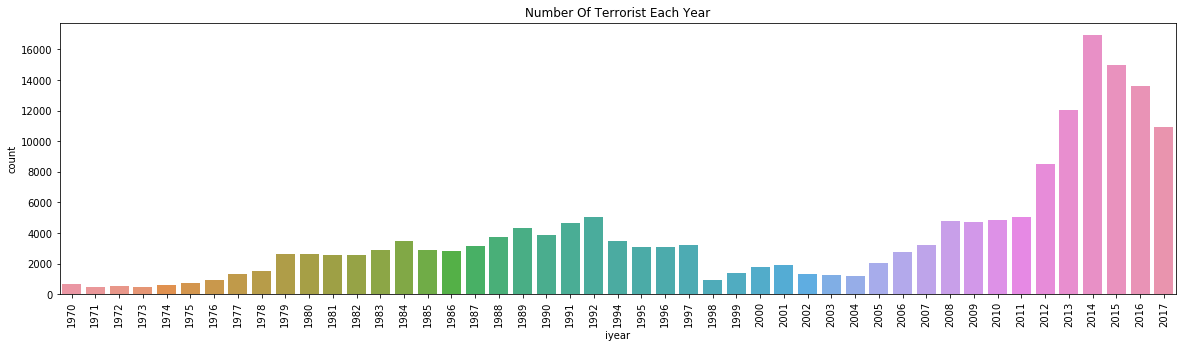

In [0]:
plt.subplots(figsize=(20,5))
sns.countplot('iyear',data=df)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Each Year')
plt.show()

**Number Of Weapons Type**

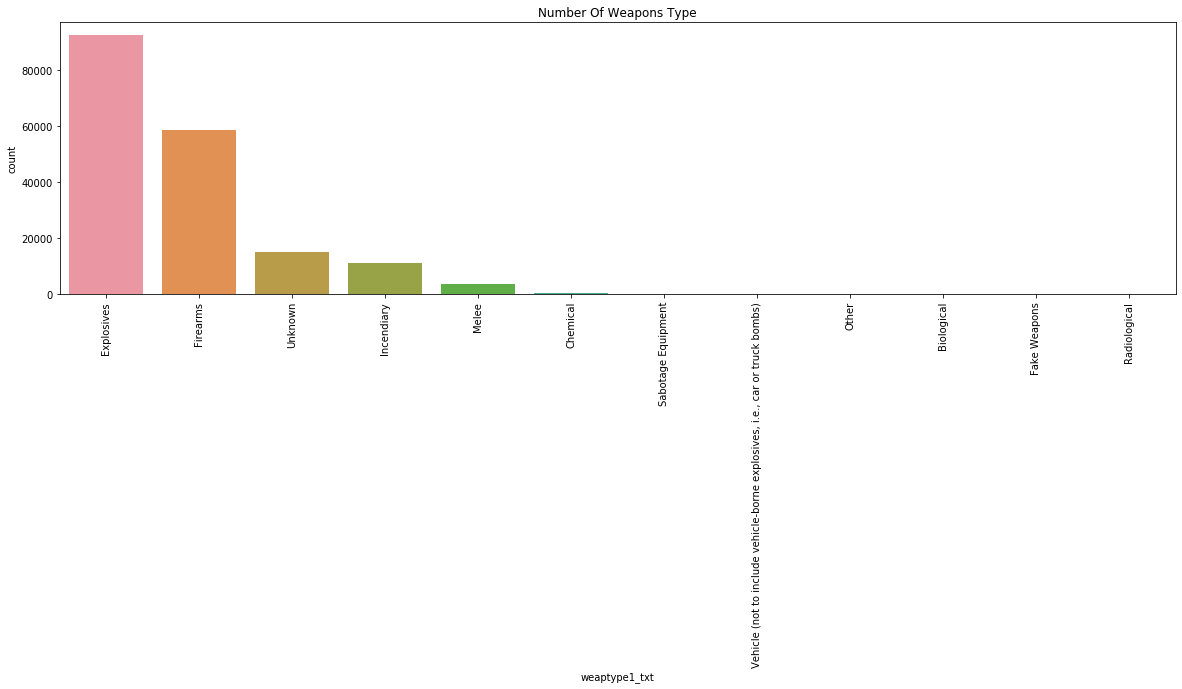

In [0]:
plt.subplots(figsize=(20,5))
sns.countplot('weaptype1_txt',data=df, order=df['weaptype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Weapons Type')
plt.show()

**Number Of Targets**

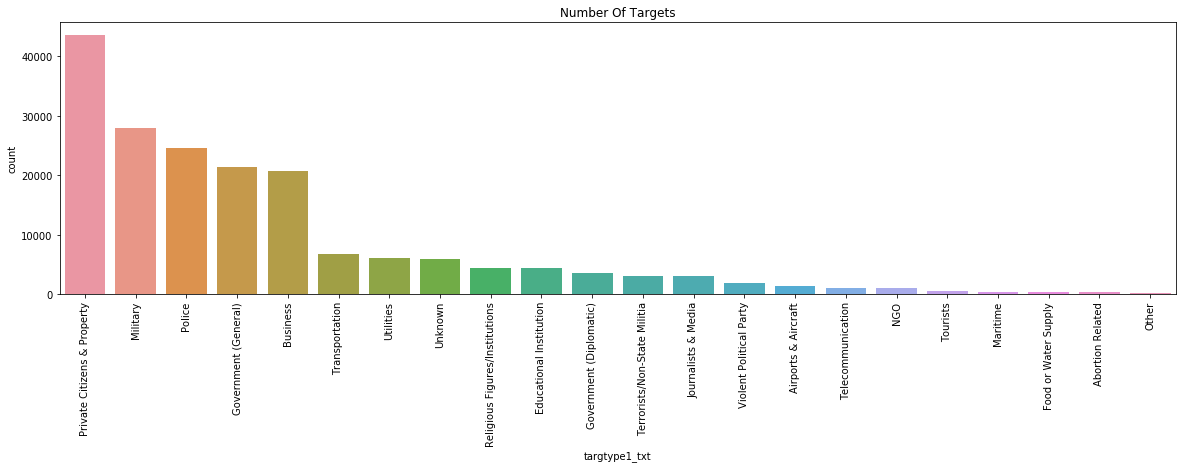

In [0]:
plt.subplots(figsize=(20,5))
sns.countplot('targtype1_txt',data=df, order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Targets')
plt.show()

**Activity of Top 5 Terrorist Groups**

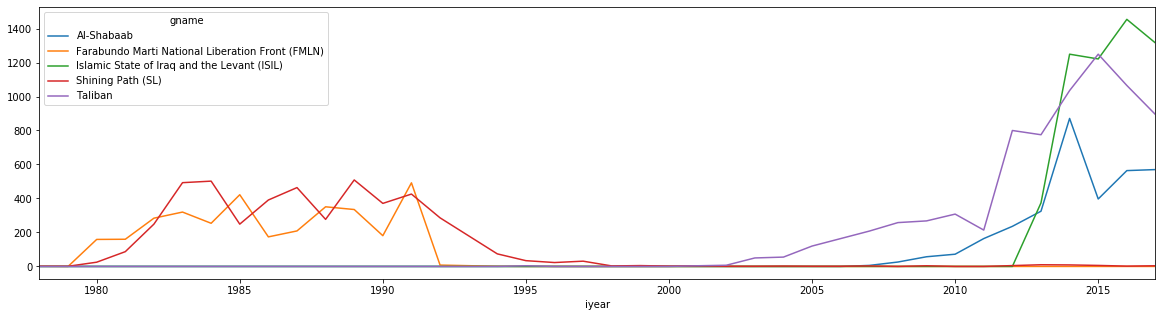

In [0]:
gnameTop=df[df['gname'].isin(df['gname'].value_counts()[1:6].index)]
pd.crosstab(gnameTop['iyear'],gnameTop['gname']).plot()
fig=plt.gcf()
fig.set_size_inches(20,5)
plt.show()


In [0]:
df.to_csv('df.csv')
files.download('df.csv')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 51144, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

#Thank you!